In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import json
import os
import torch
import matplotlib.pyplot as plt
import numpy as np
import yaml
from ipyfilechooser import FileChooser

# Creating your submission_config file

This file will tell the preprocessing pipeline how each submission should be processed. I will show two examples of possible submissions and explain how different parameters affect the pipeline.

In [11]:
# Select path to submissions
path_to_sub_set = FileChooser(os.path.expanduser("~"))
path_to_sub_set.show_only_dirs = True
display(path_to_sub_set)

FileChooser(path='/home/flex', filename='', title='', show_hidden=False, select_desc='Select', change_desc='Ch…

In [12]:
# Select path to submissions (submission 1)
submission1_path = FileChooser(path_to_sub_set.selected_path)
submission1_path.show_only_dirs = True
display(submission1_path)

FileChooser(path='/data/flex/ScipionUserData/projects/Challenge_Flatiron_Second_New_Dataset', filename='', tit…

In [13]:
# Select path to submissions (submission 2)
submission2_path = FileChooser(path_to_sub_set.selected_path)
submission2_path.show_only_dirs = True
display(submission2_path)

FileChooser(path='/data/flex/ScipionUserData/projects/Challenge_Flatiron_Second_New_Dataset', filename='', tit…

In [14]:
# Select path to Ground Truth
path_gt = FileChooser(os.path.expanduser("~"))
path_gt.show_only_dirs = True
display(path_gt)

FileChooser(path='/home/flex', filename='', title='', show_hidden=False, select_desc='Select', change_desc='Ch…

In [15]:
submission_config = {
    "gt": {
        "name": "gt",
        "path": path_gt.selected_path,
        "box_size": 224,
        "pixel_size": 1.073 * 2,
        "ref_align_fname": "1.mrc",
    },
    0: {
        "name": "submission1",
        "align": 0,
        "box_size": 144,
        "pixel_size": 1.073 * 2,
        "path": submission1_path.selected_path,
    },
    1: {
        "name": "submission2",
        "align": 1,
        "box_size": 288,
        "pixel_size": 1.073,
        "path": submission2_path.selected_path,
    },
}

In [16]:
# create submission config
with open("submission_config.json", "w") as f:
    json.dump(submission_config, f, indent=4)

# load submission_config from json
with open("submission_config.json", "r") as f:
    submission_config = json.load(f)

After you create your submission_config, simply grab a copy of the file "config_preproc.yaml" from the provided config_files, and change the path for the "submission_config_file" to the file we created in the previous cell. Also change the path for the output. The rest of the parameters you can leave untouched. Please see the publication "Singer, A., & Yang, R. (2024). Alignment of density maps in Wasserstein distance. Biological Imaging, 4, e5" for more details. Then simply run

```bash
cryo_challenge run_preprocessing --config /path/to/config_preproc.yaml
```

Note: make sure to activate your environment and have the package installed!

You can run the following cell to visualize your volumes (more precisely, a projection of them)

In [19]:
# Select path to Config
config_preproc_path = FileChooser(os.path.expanduser("~"))
config_preproc_path.filter_pattern = '*.yaml'
display(config_preproc_path)

FileChooser(path='/home/flex', filename='', title='', show_hidden=False, select_desc='Select', change_desc='Ch…

In [20]:
# Get output path from config file
with open(config_preproc_path.selected_filename, "r") as f:
    config_preproc = yaml.safe_load(f)
output_path = config_preproc["output_path"]

torch.Size([80, 224, 224, 224]) Mango


FileNotFoundError: [Errno 2] No such file or directory: '/home/flex/Projects/Cryo-EM-Heterogeneity-Challenge-1/tutorials/results/submission_1.pt'

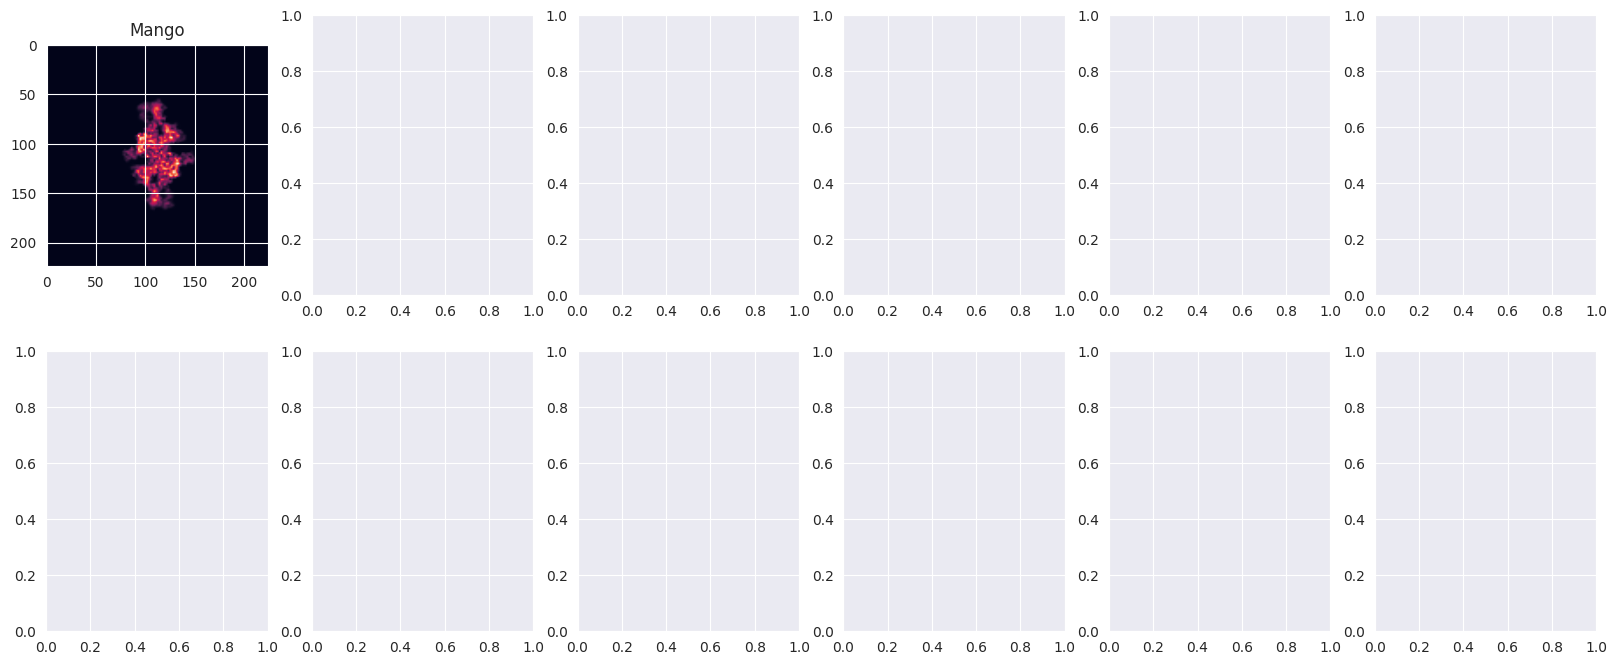

In [21]:
n_submissions = 2  # change this to however many submissions you preprocessed

fig, ax = plt.subplots(2, 6, figsize=(20, 8))  # change values here too

for i in range(n_submissions):
    idx = np.random.randint(
        0, 20
    )  # doing random volumes to check that everything went fine

    submission = torch.load(os.path.join(output_path, f"submission_{i}.pt"))
    print(submission["volumes"].shape, submission["id"])
    ax.flatten()[i].imshow(submission["volumes"][idx].sum(axis=0))
    ax.flatten()[i].set_title(submission["id"])